In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import animation, rc
from IPython.display import HTML
import random
import pandas as pd
from math import ceil
import sys

#Graph Modules
import plotly.io as pio
import plotly.express as px
import plotly
pio.renderers.default = 'iframe_connected'
import seaborn as sns
from collections import Counter

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Warning
The code here has been re-ran and graphs only may show different values due to error of display chart inside Jupyter lab
This is just a newer version (ran in a later date) than the report!
Thank you for your understanding!

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Base data
Mutations = [['SARS-CoV-2', 1], ['B.1.1.7', 1.5], ['B.1.351', 1.5]]

#https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/variant-surveillance/variant-info.html - 'B.1.1.7' or United Kingdom mutant
#https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/variant-surveillance/variant-info.html - 'B.1.152' or South African Mutant

In [4]:
defaultY = 200
defaultX = 400

class Person():
    #                  infected, what type of mutation, spread radius, xMovement, yMovement, boardSize for x, board size for y, borders if any
    def __init__(self, infected, mutationType, spreadRadius, xPlus, yPlus, days, boardX = defaultX, boardY = defaultY, borders = None):
        self.position = [int(random.uniform(1, boardX)), int(random.uniform(1, boardY))]
        
        self.rateX = xPlus
        self.rateY = yPlus
        
        self.infected = infected
        self.immune = False
        self.days = days
        self.mutation = mutationType
        self.spreadRadius = spreadRadius
        
        self.xPlus = random.choice([int(random.uniform(2, self.rateX)), int(random.uniform(-int(self.rateX), -2))])
        self.yPlus = random.choice([int(random.uniform(2, self.rateY)), int(random.uniform(-int(self.rateY), -2))])
        
        self.boardX = boardX
        self.boardY = boardY
        
        self.border = borders
        
    def move(self):
        self.position = [int(self.position[0] + self.xPlus), int(self.position[1] + self.yPlus)]
        
        #Hit the Corner
        if (self.position[0] + self.xPlus) < 0:
            self.xPlus = int(random.uniform(2, self.rateX))
        elif (self.position[0] + self.xPlus) >= self.boardX:
            self.xPlus = int(random.uniform(-self.rateX, -2))
            
        if (self.position[1] + self.yPlus) < 0:
            self.yPlus = int(random.uniform(2, self.rateY))
        elif (self.position[1] + self.yPlus) > self.boardY:
            self.yPlus = int(random.uniform(-self.rateY, -2))
    
class Board():
    def __init__(self, boardX, boardY, Num, perPersonSpeedX, perPersonSpeedY, radius, infectionLength, variants, borders = None):
        self.boardSizeX = boardX
        self.boardSizeY = boardY
        self.radius = radius
        self.infectionLength = infectionLength
        self.borders = borders
        self.variants = variants
        self.cumlativeMutants = variants

        self.population = []
        #Add Infected Person
        #infected, mutationType, spreadRadius, xPlus, yPlus, boardX = defaultX, boardY = defaultY, borders = None
        for variant in self.cumlativeMutants:
            self.population.append(Person(True, variant[0], self.radius*variant[1], perPersonSpeedX, perPersonSpeedY, 0, self.boardSizeX, self.boardSizeY))
        self.population = self.population + [Person(False, None, None, int(random.uniform(1, perPersonSpeedX)), int(random.uniform(1, perPersonSpeedY)), 0, self.boardSizeX, self.boardSizeY, self.borders) for i in range(Num-len(self.cumlativeMutants))]
        
        self.infectedIndexes = [i for i in range(len(self.population)) if self.population[i].infected == True]
        self.infectionCount = len(self.infectedIndexes)
        self.recoveredCount = 0
        
    def move(self):
        for i in range(len(self.population)):
            self.population[i].move()
        
        ########################################## CHECK if paitent recovered ####################################################
        #most Infection end around 2 weeks so we are going to make many people immune after 2 weeks 40% to be immune after 2 weeks
        for index in self.infectedIndexes:
            if self.population[index].days > self.infectionLength:
                per = random.uniform(0, 1)
                if per < 0.4:
                    self.population[index].days += 0.1
                else:
                    self.population[index].immune = True
                    self.recoveredCount += 1
                    self.infectedIndexes.remove(index)
            else:
                self.population[index].days += 0.1
                
        
        ################################# Updated infections's positions and their variants ######################################
        #Update all infected indexes
        #self.infectedIndexes = [index for index in range(len(self.population)) if self.population[index].infected == True and self.population[index].immune == False]
        positions = []
        infectorIndexes = []
        variant = []
        spreadRadiusList = []
        for personIndex in self.infectedIndexes:
            position = self.population[personIndex].position
            for i in range(1, ceil(self.population[personIndex].spreadRadius)):
                p = [int(position[0] + i), int(position[1])]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0]), int(position[1] + i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] + i), int(position[1] + i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] - i), int(position[1])]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0]), int(position[1] - i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] - i), int(position[1] - i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] + i), int(position[1] - i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] - i), int(position[1] + i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
        #print(len(positions), len(infectorIndexes), len(variant), len(spreadRadiusList))
        #print(Counter(variant))
        
        for personIndex in range(len(self.population)):
            if self.population[personIndex].position in positions and self.population[personIndex].infected == False and self.population[personIndex].immune == False:
                idx = positions.index(self.population[personIndex].position)
                self.population[personIndex].infected = True
                self.population[personIndex].mutation = variant[idx]
                self.population[personIndex].spreadRadius = spreadRadiusList[idx]
                self.infectedIndexes.append(personIndex)
                
    def moveWithLockDown(self, x):
        limit = len(self.population) * (1-x)
        self.population[0].move()
        for i in range(int(limit),len(self.population)):
            self.population[i].move()
        
        ########################################## CHECK if paitent recovered ####################################################
        #most Infection end around 2 weeks so we are going to make many people immune after 2 weeks 40% to be immune after 2 weeks
        for index in self.infectedIndexes:
            if self.population[index].days > self.infectionLength:
                per = random.uniform(0, 1)
                if per < 0.4:
                    self.population[index].days += 0.1
                else:
                    self.population[index].immune = True
                    self.recoveredCount += 1
                    self.infectedIndexes.remove(index)
            else:
                self.population[index].days += 0.1
                
        
        ################################# Updated infections's positions and their variants ######################################
        #Update all infected indexes
        #self.infectedIndexes = [index for index in range(len(self.population)) if self.population[index].infected == True and self.population[index].immune == False]
        positions = []
        infectorIndexes = []
        variant = []
        spreadRadiusList = []
        for personIndex in self.infectedIndexes:
            position = self.population[personIndex].position
            for i in range(1, ceil(self.population[personIndex].spreadRadius)):
                p = [int(position[0] + i), int(position[1])]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0]), int(position[1] + i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] + i), int(position[1] + i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] - i), int(position[1])]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0]), int(position[1] - i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] - i), int(position[1] - i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] + i), int(position[1] - i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
                p = [int(position[0] - i), int(position[1] + i)]
                if p not in positions:
                    positions.append(p)
                    infectorIndexes.append(personIndex)
                    variant.append(self.population[personIndex].mutation)
                    spreadRadiusList.append(self.population[personIndex].spreadRadius)
                    
        #print(len(positions), len(infectorIndexes), len(variant), len(spreadRadiusList))
        #print(Counter(variant))
        
        for personIndex in range(len(self.population)):
            if self.population[personIndex].position in positions and self.population[personIndex].infected == False and self.population[personIndex].immune == False:
                idx = positions.index(self.population[personIndex].position)
                self.population[personIndex].infected = True
                self.population[personIndex].mutation = variant[idx]
                self.population[personIndex].spreadRadius = spreadRadiusList[idx]
                self.infectedIndexes.append(personIndex)
                
    def checkImmunity(self):
        ########################################## CHECK if paitent recovered ####################################################
        #most Infection end around 2 weeks so we are going to make many people immune after 2 weeks 40% to be immune after 2 weeks
        for index in self.infectedIndexes:
            if self.population[index].days > self.infectionLength:
                per = random.uniform(0, 1)
                if per < 0.4:
                    self.population[index].days += 0.1
                else:
                    self.population[index].immune = True
                    self.recoveredCount += 1
                    self.infectedIndexes.remove(index)
            else:
                self.population[index].days += 0.1
    
    def radiusPositionSpread(self, position, spread):
        ans = [position]
        for i in range(1, ceil(spread)):
            ans.append([int(position[0] + i), int(position[1])])
            ans.append([int(position[0]), int(position[1] + i)])
            ans.append([int(position[0] + i), int(position[1] + i)])
                        
            ans.append([int(position[0] - i), int(position[1])])
            ans.append([int(position[0]), int(position[1] - i)])
            ans.append([int(position[0] - i), int(position[1] - i)])

            ans.append([int(position[0] + i), int(position[1] - i)])
            ans.append([int(position[0] - i), int(position[1] + i)])
        return ans
        

In [5]:
def makeData(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants):
    #boardX, boardY, Num, perPersonSpeedX, perPersonSpeedY, radius, infectionLength, variants, borders = None
    board = Board(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants)
    df = pd.DataFrame(columns=['frame', 'x', 'y', 'color', 'totalInfected'])
    
    for frame in range(maxFrames):
        board.moveWithLockDown()
        
        xValue = []
        yValue = []
        color = []
        pID = []
        personType = []
        
        for personID in range(len(board.population)):
            if board.population[personID].immune == True:
                xValue.append(board.population[personID].position[0])
                yValue.append(board.population[personID].position[1])
                color.append('green')
                pID.append(int(personID))
                personType.append('Immune')
            elif board.population[personID].infected == True:
                xValue.append(board.population[personID].position[0])
                yValue.append(board.population[personID].position[1])
                color.append('red')
                pID.append(int(personID))
                personType.append('Infecious(' + str(board.population[personID].mutation) + ')')
            else:
                xValue.append(board.population[personID].position[0])
                yValue.append(board.population[personID].position[1])
                color.append('blue')
                pID.append(int(personID))
                personType.append('Normal')
        
        tempDF_UnInfected = pd.DataFrame({
            'frame': frame,
            'id':pID,
            'x': xValue,
            'y': yValue,
            'color': color,
            'totalInfected': board.infectionCount,
            'Recovered': board.recoveredCount,
            'Type': personType
        })
        
        #Add Immune People Before hand so the category will exists
        tempDF_UnInfected = tempDF_UnInfected.append({
            'frame': frame,
            'id':int(len(pID)),
            'x': 10000,
            'y': 10000,
            'color': 'green',
            'totalInfected': board.infectionCount,
            'Recovered': board.recoveredCount,
            'Type': 'Immune'
        }, ignore_index = True)
        
        tempDF_UnInfected = tempDF_UnInfected.sort_values(['id'])
        
        
        df = pd.concat([df, tempDF_UnInfected])
    return df

In [6]:
populationSize = 200
xSpeedMax = 6
ySpeedMax = 8
spreadRadius = 5
maxFrames = 400
infectionLength = 14
variants = [['SARS-CoV-2', 1]]
defaultY = 200
defaultX = 400

try:
    #For Normal Covid
    data = pd.read_csv('data/simulation_Normal_SARS_COV_2.csv')
except Exception:
    data = makeData(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants)
    data.to_csv('data/simulation_Normal_SARS_COV_2.csv')
    
try:
    #For UK variant covid
    data = pd.read_csv('data/simulation_UK_variant_Only.csv')
except Exception:
    data = makeData(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, [['B.1.1.7', 1.5]])
    data.to_csv('data/simulation_UK_variant_Only.csv')

In [7]:
fig = px.scatter(pd.read_csv('data/simulation_Normal_SARS_COV_2.csv'), x = 'x', y = 'y', animation_frame='frame', animation_group = 'id', color='Type', range_x=[0,defaultX], range_y=[0, defaultY], title='Infections over 10 days for Covid-19')
fig.show()

In [8]:
fig_with_Variant = px.scatter(pd.read_csv('data/simulation_UK_variant_Only.csv'), x = 'x', y = 'y', animation_frame='frame', animation_group = 'id', color='Type', range_x=[0,defaultX], range_y=[0, defaultY], title='Infections over 10 days for UK mutation')
fig_with_Variant.show()

In [9]:
#Combination of SARS-COV-2 and B.1.1.7
populationSize = 200
xSpeedMax = 6
ySpeedMax = 8
spreadRadius = 5
maxFrames = 400
infectionLength = 14
variants = [['B.1.1.7', 1.5], ['SARS-CoV-2', 1]]
defaultY = 200
defaultX = 400

try:
    data = pd.read_csv('data/simulation_UK_variant_Combination.csv')
except Exception:
    data = makeData(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants)
    data.to_csv('data/simulation_UK_variant_Combination.csv')

In [10]:
#SARS-COV-2 X 2
populationSize = 200
xSpeedMax = 6
ySpeedMax = 8
spreadRadius = 5
maxFrames = 400
infectionLength = 14
variants = [['SARS-CoV-2', 1], ['SARS-CoV-2', 1]]
defaultY = 200
defaultX = 400

try:
    data = pd.read_csv('data/simulation_2_SARS_COV_2.csv')
except Exception:
    data = makeData(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants)
    data.to_csv('data/simulation_2_SARS_COV_2.csv')

In [11]:
fig_with_Variant_comb = px.scatter(pd.read_csv('data/simulation_UK_variant_Combination.csv'), x = 'x', y = 'y', animation_frame='frame', animation_group = 'id', color='Type', range_x=[0,defaultX], range_y=[0, defaultY], title='Infections over 10 days for Covid-19 and its UK mutation each')
fig_with_Variant_comb.show()

In [12]:
fig_with_COVID_Dual = px.scatter(pd.read_csv('data/simulation_2_SARS_COV_2.csv'), x = 'x', y = 'y', animation_frame='frame', animation_group = 'id', color='Type', range_x=[0,defaultX], range_y=[0, defaultY], title='Infections over 10 days for Covid-19 (2 of them)')
fig_with_COVID_Dual.show()

In [13]:
def makeDataset(data, infectionType, frames):
    df = pd.DataFrame(columns=['x', 'infection', 'recovered', 'susceptible'])
    infectionCount = 0
    recovered = 0
    susceptible = 0
    
    for i in range(frames):
        tempdf = data[data['frame']==i]['Type'].tolist()
        infectionCount = tempdf.count(infectionType)
        recovered = tempdf.count('Immune')
        susceptible = tempdf.count('Normal')
        if infectionType == 'all':
            infectionCount = 200 - (recovered + susceptible)
    
        df = df.append({
                'x': i,
                'infection':infectionCount,
                'recovered': recovered,
                'susceptible': susceptible
            }, ignore_index = True)
        
    return df

In [14]:
ukVaraint = makeDataset(pd.read_csv('data/simulation_UK_variant_Only.csv'), 'Infecious(B.1.1.7)', 400)
nonVariant = makeDataset(pd.read_csv('data/simulation_Normal_SARS_COV_2.csv'), 'Infecious(SARS-CoV-2)', 400)

compare_fig = make_subplots(rows=1, cols=2, subplot_titles=("UK Variant and Normal Variant", "Normal Covid-19"))

compare_fig.add_trace(
    go.Scatter(x=ukVaraint['x'].tolist(), y=ukVaraint['infection'].tolist(), fill='tozeroy', name='UK Variant B.1.1.7'),
    row=1, col=1
)

compare_fig.add_trace(
    go.Scatter(x=nonVariant['x'].tolist(), y=nonVariant['infection'].tolist(), fill='tonexty', name='Normal SARS-CoV-2'),
    row=1, col=2
)

compare_fig.add_hrect(y0=0, y1=50, line_width=0, fillcolor="green", opacity=0.3)


compare_fig.update_layout(height=600, width=2000, title_text="UK variant vs Normal SARS-Cov-2")
compare_fig.show()

In [15]:
ukVaraint = makeDataset(pd.read_csv('data/simulation_UK_variant_Combination.csv'), 'Infecious(B.1.1.7)', 400)
normalVariant = makeDataset(pd.read_csv('data/simulation_UK_variant_Combination.csv'), 'Infecious(SARS-CoV-2)', 400)
totalInfections = makeDataset(pd.read_csv('data/simulation_UK_variant_Combination.csv'), 'all', 400)
nonVariant = makeDataset(pd.read_csv('data/simulation_2_SARS_COV_2.csv'), 'Infecious(SARS-CoV-2)', 400)

compare_fig = make_subplots(rows=1, cols=2, subplot_titles=("UK Variant and Normal Variant", "Normal Covid-19"))

compare_fig.add_trace(
    go.Scatter(x=totalInfections['x'].tolist(), y=totalInfections['infection'].tolist(), fill='tozeroy', name='Total'),
    row=1, col=1
)

compare_fig.add_trace(
    go.Scatter(x=ukVaraint['x'].tolist(), y=ukVaraint['infection'].tolist(), fill='tozeroy', name='UK Variant B.1.1.7 and Normal SARS-COV-2'),
    row=1, col=1
)

compare_fig.add_trace(
    go.Scatter(x=normalVariant['x'].tolist(), y=normalVariant['infection'].tolist(), fill='tonexty', name='Normal SARS-CoV-2'),
    row=1, col=1
)

compare_fig.add_trace(
    go.Scatter(x=nonVariant['x'].tolist(), y=nonVariant['infection'].tolist(), fill='tonexty', name='Normal SARS-CoV-2 X 2'),
    row=1, col=2
)

compare_fig.add_hrect(y0=0, y1=50, line_width=0, fillcolor="green", opacity=0.3)


compare_fig.update_layout(height=600, width=2000, title_text="UK variant vs Normal SARS-Cov-2")
compare_fig.show()

In [16]:
def makeData_with_curfew(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants):
    #boardX, boardY, Num, perPersonSpeedX, perPersonSpeedY, radius, infectionLength, variants, borders = None
    board = Board(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants)
    df = pd.DataFrame(columns=['frame', 'x', 'y', 'color', 'totalInfected'])
    
    for frame in range(maxFrames):
        if int(str(frame)[-1]) % 7 != 0 and int(str(frame)[-1]) % 8 != 0 and int(str(frame)[-1]) % 9 != 0 and int(str(frame)[-1]) % 10 != 0:
            board.move()
        else:
            board.checkImmunity()
        
        xValue = []
        yValue = []
        color = []
        pID = []
        personType = []
        
        for personID in range(len(board.population)):
            if board.population[personID].immune == True:
                xValue.append(board.population[personID].position[0])
                yValue.append(board.population[personID].position[1])
                color.append('green')
                pID.append(int(personID))
                personType.append('Immune')
            elif board.population[personID].infected == True:
                xValue.append(board.population[personID].position[0])
                yValue.append(board.population[personID].position[1])
                color.append('red')
                pID.append(int(personID))
                personType.append('Infecious(' + str(board.population[personID].mutation) + ')')
            else:
                xValue.append(board.population[personID].position[0])
                yValue.append(board.population[personID].position[1])
                color.append('blue')
                pID.append(int(personID))
                personType.append('Normal')
        
        tempDF_UnInfected = pd.DataFrame({
            'frame': frame,
            'id':pID,
            'x': xValue,
            'y': yValue,
            'color': color,
            'totalInfected': board.infectionCount,
            'Recovered': board.recoveredCount,
            'Type': personType
        })
        
        #Add Immune People Before hand so the category will exists
        tempDF_UnInfected = tempDF_UnInfected.append({
            'frame': frame,
            'id':int(len(pID)),
            'x': 10000,
            'y': 10000,
            'color': 'green',
            'totalInfected': board.infectionCount,
            'Recovered': board.recoveredCount,
            'Type': 'Immune'
        }, ignore_index = True)
        
        tempDF_UnInfected = tempDF_UnInfected.sort_values(['id'])
        
        
        df = pd.concat([df, tempDF_UnInfected])
    return df

populationSize = 200
xSpeedMax = 6
ySpeedMax = 8
spreadRadius = 5
maxFrames = 400
infectionLength = 14
variants = [['SARS-CoV-2', 1]]
defaultY = 200
defaultX = 400

try:
    curfewData_9 = pr.read_csv('Data/covid_With_Curfew_9.csv')
except Exception:
    curfewData_9 = makeData_with_curfew(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants)
    curfewData_9.to_csv('Data/covid_With_Curfew_9.csv')

In [17]:
fig_with_Curfew = px.scatter(curfewData_9, x = 'x', y = 'y', animation_frame='frame', animation_group = 'id', color='Type', range_x=[0,defaultX], range_y=[0, defaultY], title='Infections over 10 days for Covid-19 and its UK mutation')
fig_with_Curfew.show()

In [18]:
withCurfew = makeDataset(curfewData_9, 'Infecious(SARS-CoV-2)', 400)
noCurfew = makeDataset(pd.read_csv('data/simulation_Normal_SARS_COV_2.csv'), 'Infecious(SARS-CoV-2)', 400)

compare_fig = make_subplots(rows=1, cols=2, subplot_titles=("Curfew for 30% of the day", "Normal Covid-19"))

compare_fig.add_trace(
    go.Scatter(x=withCurfew['x'].tolist(), y=withCurfew['infection'].tolist(), fill='tozeroy', name='Curfew from 30% of the day'),
    row=1, col=1
)

compare_fig.add_trace(
    go.Scatter(x=noCurfew['x'].tolist(), y=noCurfew['infection'].tolist(), fill='tonexty', name='Normal SARS-CoV-2'),
    row=1, col=2
)

compare_fig.add_hrect(y0=0, y1=50, line_width=0, fillcolor="green", opacity=0.3)


compare_fig.update_layout(height=600, width=2000, title_text="Curfew vs No-Curfew")
compare_fig.show()

# Lock Down and movement for only essential workers

Around 3.1 million people are considered ESSENTIAL workers and we will only allow them to commute
3.1/25 = 15.5 %


#### https://www.theaustralian.com.au/world/coronavirus-the-essential-workers-wholl-keep-australia-ticking-along/news-story/cb7992b6ae722afd0838f17e61338e01

In [19]:
def makeData_with_LockDown(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants):
    #boardX, boardY, Num, perPersonSpeedX, perPersonSpeedY, radius, infectionLength, variants, borders = None
    board = Board(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants)
    df = pd.DataFrame(columns=['frame', 'x', 'y', 'color', 'totalInfected'])
    
    for frame in range(maxFrames):
        board.moveWithLockDown(0.15)
        
        xValue = []
        yValue = []
        color = []
        pID = []
        personType = []
        
        for personID in range(len(board.population)):
            if board.population[personID].immune == True:
                xValue.append(board.population[personID].position[0])
                yValue.append(board.population[personID].position[1])
                color.append('green')
                pID.append(int(personID))
                personType.append('Immune')
            elif board.population[personID].infected == True:
                xValue.append(board.population[personID].position[0])
                yValue.append(board.population[personID].position[1])
                color.append('red')
                pID.append(int(personID))
                personType.append('Infecious(' + str(board.population[personID].mutation) + ')')
            else:
                xValue.append(board.population[personID].position[0])
                yValue.append(board.population[personID].position[1])
                color.append('blue')
                pID.append(int(personID))
                personType.append('Normal')
        
        tempDF_UnInfected = pd.DataFrame({
            'frame': frame,
            'id':pID,
            'x': xValue,
            'y': yValue,
            'color': color,
            'totalInfected': board.infectionCount,
            'Recovered': board.recoveredCount,
            'Type': personType
        })
        
        #Add Immune People Before hand so the category will exists
        tempDF_UnInfected = tempDF_UnInfected.append({
            'frame': frame,
            'id':int(len(pID)),
            'x': 10000,
            'y': 10000,
            'color': 'green',
            'totalInfected': board.infectionCount,
            'Recovered': board.recoveredCount,
            'Type': 'Immune'
        }, ignore_index = True)
        
        tempDF_UnInfected = tempDF_UnInfected.sort_values(['id'])
        
        
        df = pd.concat([df, tempDF_UnInfected])
    return df

#2 SARS-COV-2 X 2
populationSize = 200
xSpeedMax = 6
ySpeedMax = 8
spreadRadius = 5
maxFrames = 400
infectionLength = 14
variants = [['SARS-CoV-2', 1]]
defaultY = 200
defaultX = 400

essentialWorkers = makeData_with_LockDown(defaultX, defaultY, populationSize, xSpeedMax, ySpeedMax, spreadRadius, infectionLength, variants)

In [20]:
fig_with_Essential = px.scatter(essentialWorkers, x = 'x', y = 'y', animation_frame='frame', animation_group = 'id', color='Type', range_x=[0,defaultX], range_y=[0, defaultY], title='Lockdown and only Essential workers can travel')
fig_with_Essential.show()

In [21]:
essential = makeDataset(essentialWorkers, 'Infecious(SARS-CoV-2)', 400)
nonessential = makeDataset(pd.read_csv('data/simulation_Normal_SARS_COV_2.csv'), 'Infecious(SARS-CoV-2)', 400)

compare_fig = make_subplots(rows=1, cols=2, subplot_titles=("Lockdown", "Normal Covid-19"))

compare_fig.add_trace(
    go.Scatter(x=essential['x'].tolist(), y=essential['infection'].tolist(), fill='tozeroy', name='Curfew from 30% of the day'),
    row=1, col=1
)

compare_fig.add_trace(
    go.Scatter(x=nonessential['x'].tolist(), y=nonessential['infection'].tolist(), fill='tonexty', name='Normal SARS-CoV-2'),
    row=1, col=2
)

compare_fig.add_hrect(y0=0, y1=50, line_width=0, fillcolor="green", opacity=0.3)


compare_fig.update_layout(height=600, width=2000, title_text="Lockdown vs No-Lockdown")
compare_fig.show()

# Predicting Covid-19 numbers

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly
import sys
pio.renderers.default = 'iframe_connected'
print(tf.__version__)

2.0.0


In [5]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Data'],
    x=[80],
    name='Train Data',
    orientation='h',
))
fig.add_trace(go.Bar(
    y=['Data'],
    x=[10],
    name='Test Data',
    orientation='h',
))
fig.add_trace(go.Bar(
    y=['Data'],
    x=[10],
    name='DevTest Data',
    orientation='h',
))

fig.update_layout(barmode='stack', height=300, width=1500, title_text="Data Division")
fig.show()

In [6]:
dataset = pd.read_csv('Data/owid-covid-data.csv')
dataset.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
dataset = dataset[['location', 'date', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_tests', 'positive_rate', 'total_vaccinations', 'population_density']]
mobility = pd.read_csv('Data/changes-visitors-covid.csv')
mobility['location'] = mobility['Entity']
mobility['date'] = mobility['Day']
df = pd.merge(mobility, dataset, how = 'left', on=['date', 'location'])
df = df.drop(['Entity', 'Code', 'Day'], axis = 1)
df = df.fillna(0)
df.columns

Index(['retail_and_recreation', 'grocery_and_pharmacy', 'residential',
       'transit_stations', 'parks', 'workplaces', 'location', 'date',
       'new_cases_smoothed', 'new_deaths_smoothed', 'new_tests',
       'positive_rate', 'total_vaccinations', 'population_density'],
      dtype='object')

In [10]:
mobility[mobility['location'] == 'Japan'].tail()

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,location,date
26362,Japan,JPN,2021-05-06,-6.857,4.857,12.857,-34.000,14.571,-40.429,Japan,2021-05-06
26363,Japan,JPN,2021-05-07,-8.714,3.000,12.857,-34.286,12.143,-39.429,Japan,2021-05-07
26364,Japan,JPN,2021-05-08,-8.857,3.143,12.857,-34.714,13.429,-38.143,Japan,2021-05-08
26365,Japan,JPN,2021-05-09,-9.143,3.429,13.000,-35.571,14.429,-37.429,Japan,2021-05-09
26366,Japan,JPN,2021-05-10,-13.143,2.571,11.143,-33.571,4.429,-29.286,Japan,2021-05-10


In [11]:
df[df['location'] == 'Japan'].tail()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,location,date,new_cases_smoothed,new_deaths_smoothed,new_tests,positive_rate,total_vaccinations,population_density
26362,-6.857,4.857,12.857,-34.000,14.571,-40.429,Japan,2021-05-06,4813.286,58.000,89586.0,0.085,4197463.0,347.778
26363,-8.714,3.000,12.857,-34.286,12.143,-39.429,Japan,2021-05-07,5007.857,73.286,109758.0,0.079,0.0,347.778
26364,-8.857,3.143,12.857,-34.714,13.429,-38.143,Japan,2021-05-08,5187.857,73.571,71001.0,0.082,0.0,347.778
26365,-9.143,3.429,13.000,-35.571,14.429,-37.429,Japan,2021-05-09,5285.143,74.000,41338.0,0.082,4436325.0,347.778
26366,-13.143,2.571,11.143,-33.571,4.429,-29.286,Japan,2021-05-10,5339.714,77.143,130677.0,0.070,4734029.0,347.778


In [12]:
country = 'Japan'
data = df[df['location'] == country]
data.sort_values(by='date', ascending = False, inplace=True)
data = data.drop(['location', 'date'], axis = 1)
print(data.head())

xData = np.array([data.iloc[0]])
yData = np.array([data.iloc[0]['new_cases_smoothed']])

for index in range(1, data.shape[0]):
    xData = np.vstack([xData, np.array([data.iloc[index]])])
    yData = np.vstack([yData, np.array([data.iloc[index]['new_cases_smoothed']])])

trainTestSplit = int(0.8 * df[df['location'] == country].shape[0])
devTestSplit = int(0.9 * df[df['location'] == country].shape[0])

xTrain = xData[:trainTestSplit]
yTrain = yData[:trainTestSplit]

xTest = xData[trainTestSplit:devTestSplit]
yTest = yData[trainTestSplit:devTestSplit]

xDevTest = xData[devTestSplit:]
yDevTest = yData[devTestSplit:]

       retail_and_recreation  grocery_and_pharmacy  residential  \
26366                -13.143                 2.571       11.143   
26365                 -9.143                 3.429       13.000   
26364                 -8.857                 3.143       12.857   
26363                 -8.714                 3.000       12.857   
26362                 -6.857                 4.857       12.857   

       transit_stations   parks  workplaces  new_cases_smoothed  \
26366           -33.571   4.429     -29.286            5339.714   
26365           -35.571  14.429     -37.429            5285.143   
26364           -34.714  13.429     -38.143            5187.857   
26363           -34.286  12.143     -39.429            5007.857   
26362           -34.000  14.571     -40.429            4813.286   

       new_deaths_smoothed  new_tests  positive_rate  total_vaccinations  \
26366               77.143   130677.0          0.070           4734029.0   
26365               74.000    41338.0     

In [13]:
# Variable we need to take into consider to taking are: Population, cumulative_positivity_rate before 14days ago, total_tests_per_thousand 14 days, total test 14 days ago, daily comfirmed test for 28 days from 14 days ago
# We will be predicting the next 14 days using past 28 days data
BatchSize = 16
SequenceLength = 7
features = xData.shape[1]

np.set_printoptions(suppress=True)

In [22]:
#BatchSize, SequenceLength, features, country, population, 0, 320
def datagen(xVals, yVals, batchSize, sequenceLength, numFeatures):
    while True:
        x_shape = (batchSize, sequenceLength, numFeatures)
        x_batch = np.zeros(shape=x_shape)

        y_shape = (batchSize, sequenceLength, 1)
        y_batch = np.zeros(shape=y_shape)
        
        for i in range(batchSize):
            index = np.random.randint(sequenceLength, len(xVals)-sequenceLength)
            
            x_batch[i] = xVals[index-sequenceLength:index]
            y_batch[i] = yVals[index:index+sequenceLength]
        
        yield (x_batch, y_batch)
        
def dataGenerator_Train(batchSize, sequenceLength, numFeatures):
    np.set_printoptions(threshold=sys.maxsize)
    while True:
        x_shape = (batchSize, sequenceLength, numFeatures)
        x_batch = np.zeros(shape=x_shape)

        y_shape = (batchSize, sequenceLength, 1)
        y_batch = np.zeros(shape=y_shape)
        
        for i in range(batchSize):
            index = np.random.randint(sequenceLength, len(xTrain)-sequenceLength)
            
            x_batch[i] = xTrain[index-sequenceLength:index]
            y_batch[i] = yTrain[index:index+sequenceLength]
        
        yield (x_batch, y_batch)

def dataGenerator_Test(batchSize, sequenceLength, numFeatures):
    while True:
        x_shape = (batchSize, sequenceLength, numFeatures)
        x_batch = np.zeros(shape=x_shape)

        y_shape = (batchSize, sequenceLength, 1)
        y_batch = np.zeros(shape=y_shape)

        for i in range(batchSize):
            index = np.random.randint(sequenceLength, len(xTest)-sequenceLength)

            x_batch[i] = xTest[index-sequenceLength:index]
            y_batch[i] = yTest[index:index+sequenceLength]
            
        yield (x_batch, y_batch)
        
def dataGenerator_DevTest(batchSize, sequenceLength, numFeatures):
    while True:
        x_shape = (batchSize, sequenceLength, numFeatures)
        x_batch = np.zeros(shape=x_shape)

        y_shape = (batchSize, sequenceLength, 1)
        y_batch = np.zeros(shape=y_shape)

        for i in range(batchSize):
            index = np.random.randint(sequenceLength, len(xDevTest)-sequenceLength)

            x_batch[i] = xDevTest[index-sequenceLength:index]
            y_batch[i] = yDevTest[index:index+sequenceLength]
            
        yield (x_batch, y_batch)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(None, features,), activation='relu'),
    tf.keras.layers.Dense(64, input_shape=(None, features,), activation='relu'),
    tf.keras.layers.Dense(128, input_shape=(None, features,), activation='relu'),
    tf.keras.layers.Dense(64, input_shape=(None, features,), activation='relu'),
    tf.keras.layers.Dense(32, input_shape=(None, features,), activation='relu'),
    #tf.compat.v1.keras.layers.CuDNNGRU(units=512, return_sequences=True, input_shape=(None, features,)),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 32)          416       
_________________________________________________________________
dense_1 (Dense)              (None, None, 64)          2112      
_________________________________________________________________
dense_2 (Dense)              (None, None, 128)         8320      
_________________________________________________________________
dense_3 (Dense)              (None, None, 64)          8256      
_________________________________________________________________
dense_4 (Dense)              (None, None, 32)          2080      
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           33        
Total params: 21,217
Trainable params: 21,217
Non-trainable params: 0
____________________________________________________

In [17]:
country = 'Japan'
history = model.fit_generator(dataGenerator_Train(BatchSize, SequenceLength, features), epochs = 1000, steps_per_epoch=200, 
              validation_data=dataGenerator_Test(BatchSize, SequenceLength, features), validation_steps=50, verbose=2)
model.save('firstModel.h5')

Epoch 1/1000
200/200 - 5s - loss: 297558.9507 - mae: 327.1920 - val_loss: 19967.7207 - val_mae: 125.3273
Epoch 2/1000
200/200 - 4s - loss: 341514.6053 - mae: 347.2926 - val_loss: 25703.3978 - val_mae: 145.0009
Epoch 3/1000
200/200 - 4s - loss: 469508.4074 - mae: 354.9184 - val_loss: 18678.6188 - val_mae: 115.3548
Epoch 4/1000
200/200 - 5s - loss: 1416348.3791 - mae: 453.2336 - val_loss: 23735.5089 - val_mae: 135.5982
Epoch 5/1000
200/200 - 5s - loss: 310412.5594 - mae: 332.0715 - val_loss: 20834.3776 - val_mae: 130.6212
Epoch 6/1000
200/200 - 4s - loss: 349030.4546 - mae: 355.5790 - val_loss: 17506.2378 - val_mae: 118.6201
Epoch 7/1000
200/200 - 5s - loss: 259350.7819 - mae: 303.9453 - val_loss: 20470.7733 - val_mae: 129.1080
Epoch 8/1000
200/200 - 5s - loss: 390736.4226 - mae: 375.2139 - val_loss: 19942.5283 - val_mae: 123.5323
Epoch 9/1000
200/200 - 5s - loss: 424629.8671 - mae: 346.6435 - val_loss: 21903.5305 - val_mae: 135.4180
Epoch 10/1000
200/200 - 5s - loss: 271692.0908 - mae: 

In [21]:
model = tf.keras.models.load_model('Model/firstModel.h5')
model.evaluate(dataGenerator_DevTest(BatchSize, SequenceLength, features, population), steps = 100)

100/100 [==============================] - 1s 8ms/step - loss: 2104.2078 - mae: 38.3150


[2104.2077783203126, 38.314995]

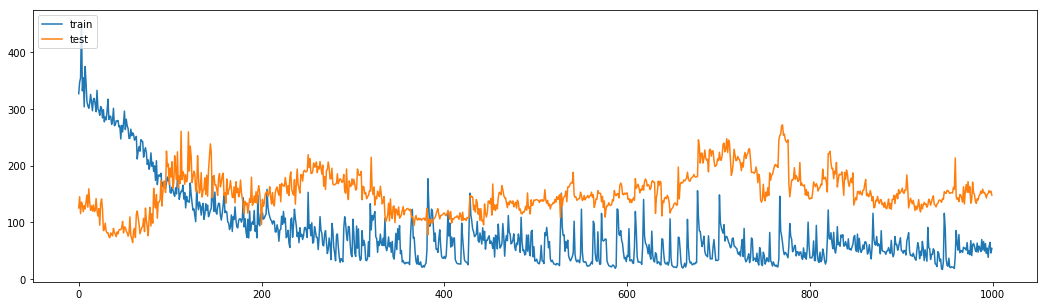

In [18]:
plt.figure(figsize=(18, 5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[148.25, 122.4375, 114.6875, 95.5625, 72.5625, 64.0, 55.15625]
[85.65009307861328, 121.42975616455078, 38.233985900878906, 53.78330993652344, 40.04692840576172, 68.74250793457031, 42.0467414855957]


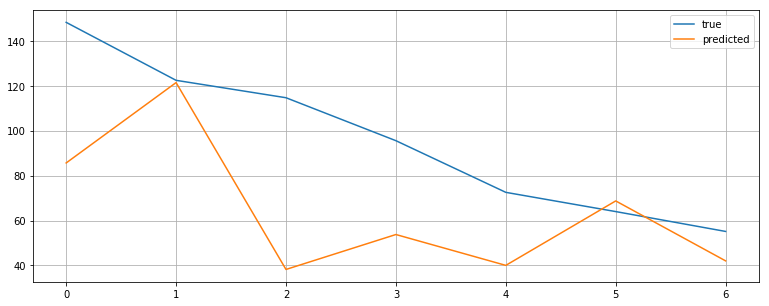

In [22]:
import matplotlib.pyplot as plt
for i in range(1):
    tempBatchSize = 1
    x_shape = (tempBatchSize, SequenceLength, features)
    x_batch = np.zeros(shape=x_shape, dtype=np.float16)

    y_shape = (tempBatchSize, SequenceLength, 1)
    y_batch = np.zeros(shape=y_shape, dtype=np.float16)

    for i in range(tempBatchSize):
        index = np.random.randint(xDevTest.shape[0] - SequenceLength)

        x_batch[i] = xDevTest[index:index+SequenceLength]
        y_batch[i] = yDevTest[index:index+SequenceLength]
    
    ans = model.predict(x_batch)
    
    ans = ans.flatten().tolist()
    y_batch = y_batch.flatten().tolist()
    
    fig = plt.figure(figsize=(13,5))
    ax = fig.add_subplot(111)
    
    print(y_batch)
    print(ans)
    ax.plot(list(range(len(y_batch))), y_batch, label = 'true')
    ax.plot(list(range(len(ans))), ans, label = 'predicted')
    ax.grid(axis='both')
   
    ax.legend()    

# For United Kingdom

In [25]:
def trainModel(country):
    BatchSize = 16
    SequenceLength = 7
    dataset = pd.read_csv('Data/owid-covid-data.csv')
    country = 'Japan'
    data = df[df['location'] == country]
    data.sort_values(by='date', ascending = False, inplace=True)
    data = data.drop(['location', 'date'], axis = 1)

    xData = np.array([data.iloc[0]])
    yData = np.array([data.iloc[0]['new_cases_smoothed']])

    for index in range(1, data.shape[0]):
        xData = np.vstack([xData, np.array([data.iloc[index]])])
        yData = np.vstack([yData, np.array([data.iloc[index]['new_cases_smoothed']])])

    trainTestSplit = int(0.8 * df[df['location'] == country].shape[0])
    devTestSplit = int(0.9 * df[df['location'] == country].shape[0])

    xTrain = xData[:trainTestSplit]
    yTrain = yData[:trainTestSplit]

    xTest = xData[trainTestSplit:devTestSplit]
    yTest = yData[trainTestSplit:devTestSplit]

    xDevTest = xData[devTestSplit:]
    yDevTest = yData[devTestSplit:]
    
    features = xData.shape[1]
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, input_shape=(None, features,), activation='relu'),
        tf.keras.layers.Dense(64, input_shape=(None, features,), activation='relu'),
        tf.keras.layers.Dense(128, input_shape=(None, features,), activation='relu'),
        tf.keras.layers.Dense(64, input_shape=(None, features,), activation='relu'),
        tf.keras.layers.Dense(32, input_shape=(None, features,), activation='relu'),
        #tf.compat.v1.keras.layers.CuDNNGRU(units=512, return_sequences=True, input_shape=(None, features,)),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mae'])
    
    country = 'Japan'
    population = 125
    history = model.fit_generator(datagen(xTrain, yTrain, BatchSize, SequenceLength, features), epochs = 1000, steps_per_epoch=200, 
                  validation_data=datagen(xTest, yTest, BatchSize, SequenceLength, features), validation_steps=50, verbose=0)
    
    return history, model, xDevTest, yDevTest

In [26]:
ukHistory, ukModel, ukxDevTest, ukyDevTest = trainModel('United Kingdom')
ukModel.save('Model/ukModel.h5')

In [32]:
ukModel.evaluate(datagen(ukxDevTest, ukyDevTest, 16, 7, 12), steps = 100)

100/100 [==============================] - 1s 6ms/step - loss: 3068.2620 - mae: 42.0461


[3068.261951904297, 42.046093]

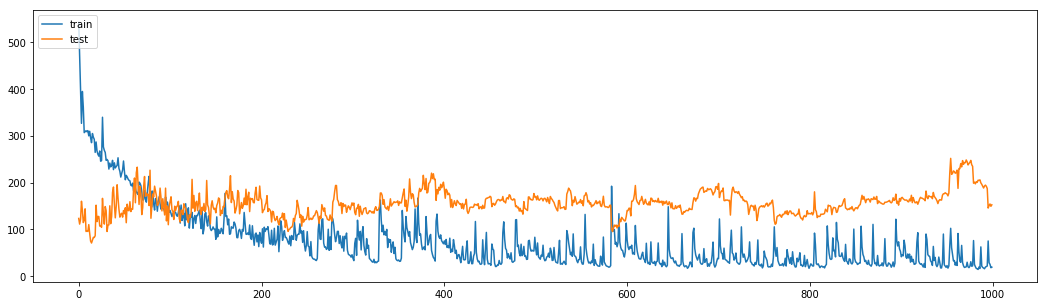

In [34]:
plt.figure(figsize=(18, 5))
plt.plot(ukHistory.history['mae'])
plt.plot(ukHistory.history['val_mae'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[44.71875, 47.28125, 43.84375, 41.0, 35.5625, 34.28125, 31.578125]
[39.00185012817383, 48.56122589111328, 28.508695602416992, 36.077247619628906, 39.56138229370117, 38.748573303222656, 42.22467803955078]


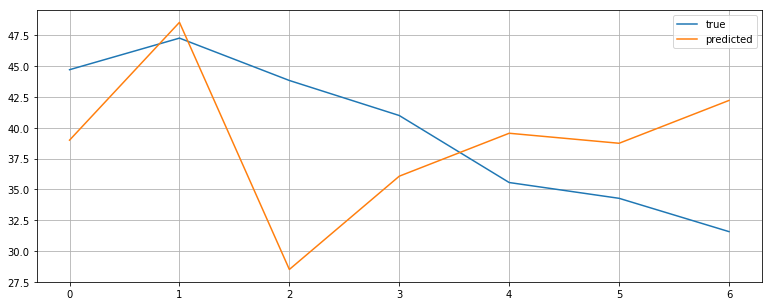

In [63]:
import matplotlib.pyplot as plt
SequenceLength = 7
features = 12
tempBatchSize = 1
for i in range(1):
    x_shape = (1, SequenceLength, features)
    x_batch = np.zeros(shape=x_shape, dtype=np.float16)

    y_shape = (1, SequenceLength, 1)
    y_batch = np.zeros(shape=y_shape, dtype=np.float16)

    for i in range(tempBatchSize):
        index = np.random.randint(ukxDevTest.shape[0] - SequenceLength)

        x_batch[i] = ukxDevTest[index:index+SequenceLength]
        y_batch[i] = ukyDevTest[index:index+SequenceLength]
    
    ans = ukModel.predict(x_batch)
    
    ans = ans.flatten().tolist()
    y_batch = y_batch.flatten().tolist()
    
    fig = plt.figure(figsize=(13,5))
    ax = fig.add_subplot(111)
    
    print(y_batch)
    print(ans)
    ax.plot(list(range(len(y_batch))), y_batch, label = 'true')
    ax.plot(list(range(len(ans))), ans, label = 'predicted')A
    ax.grid(axis='both')
   
    ax.legend()    